                                     PENDULO AMORTIGUADO
                                     
                         considere un péndulo donde ahora sí hay fuerzas de fricción actuando 
                         sobre el sistema, representadas estas fuerzas de fricción por la 
                         expresión -kv,entonces veamos:
                         
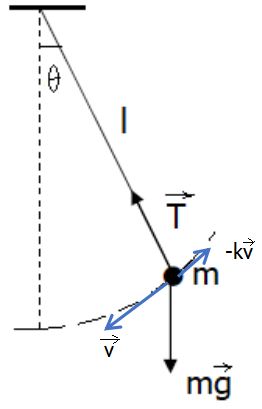

                        la ecuación de Lagrange toma la forma:
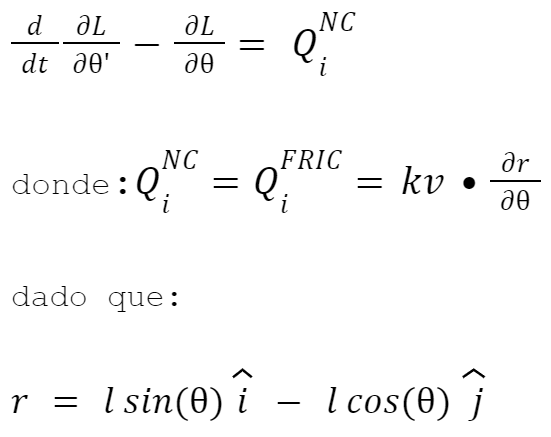
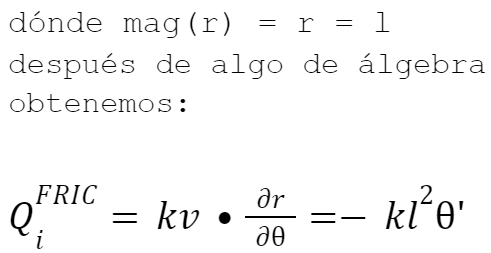
                       
                        luego , la ecuación de movimiento del péndulo simple amortiguado es:
                        
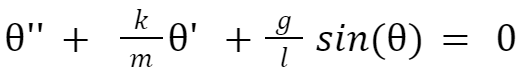

                        implementemos la solución de esta ecuación con RK4, veamos a continuación:
                        aquí el término k/m lo llamamos simplemente = 


In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


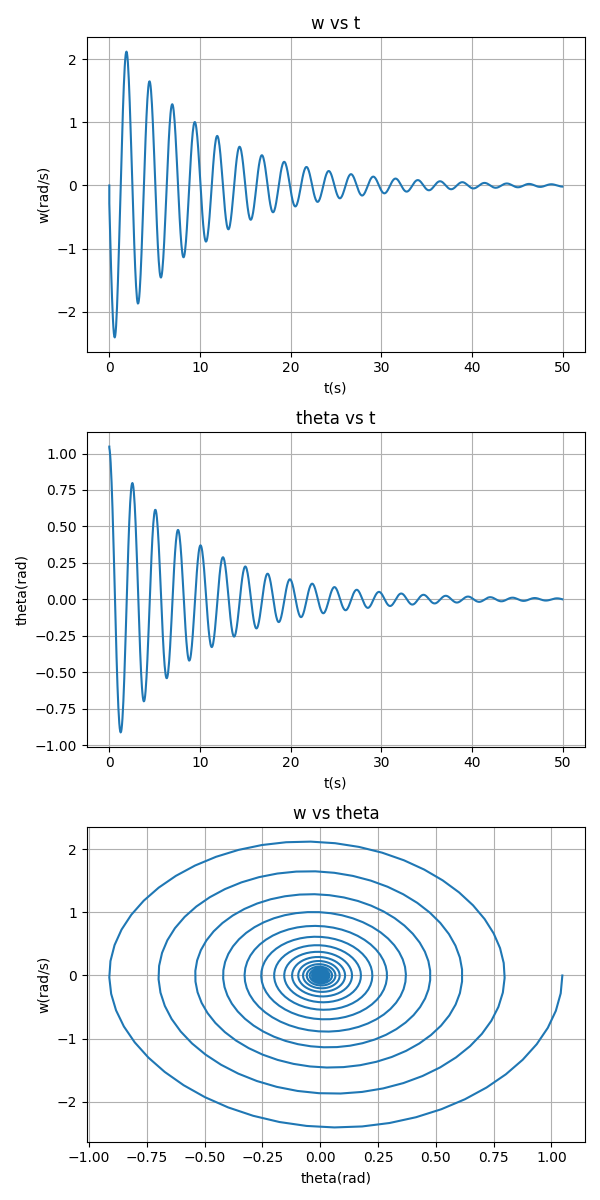

In [6]:
import matplotlib.pyplot as grf
import numpy as np
from math import*
from math import sin,cos,pi

n = 1000
t = np.zeros(n+1)
theta = np.zeros(n+1)
w = np.zeros(n+1)
r = 1.5
c = 0.2
x = [] ; y = []
to = 0 ; tf = 50 ; h = (tf - to)/n

t[0] = to
for i in range(n):
    t[i+1] = to + h*i
    
theta[0] = 60*(pi/180) 

w[0] = 0

for i in range(n):
    k1 = h*w[i]
    l1 = h*(-9.8/r)*sin(theta[i]) + h*(-c)*w[i]
    k2 =  h*(w[i] + 0.5*l1)
    l2 = h*(-9.8/r)*sin(theta[i] + 0.5*k1) + h*(-c)*w[i]
    k3 = h*(w[i] + 0.5*l2)
    l3 = h*(-9.8/r)*sin(theta[i] + 0.5*k2) + h*(-c)*w[i]
    k4 = h*(w[i] + l3)
    l4 = h*(-9.8/r)*sin(theta[i] + k3) + h*(-c)*w[i]
    
    w[i+1] = w[i] + (l1 + 2*l2 + 2*l3 + l4)/6
    theta[i+1] = theta[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    x.append(r*sin(theta[i]))
    y.append(-r*cos(theta[i]))
    
fig, ax = grf.subplots(nrows=3, figsize=(6, 12))
    
grf.subplot(311)
    
grf.title("w vs t")
grf.plot(t,w)
grf.xlabel("t(s)")
grf.ylabel("w(rad/s)")
grf.grid()
grf.subplot(312)

grf.title("theta vs t")
grf.plot(t,theta)
grf.xlabel("t(s)")
grf.ylabel("theta(rad)")
grf.grid()
grf.subplot(313)

grf.title("w vs theta")
grf.plot(theta,w)
grf.xlabel("theta(rad)")
grf.ylabel("w(rad/s)")

grf.grid()

grf.tight_layout()